In [ ]:
import cv2
from skimage.io import imshow
import os
import pandas as pd
import numpy as np

In [ ]:
!unzip '/content/drive/MyDrive/train.zip' -d '/content/drive/MyDrive/train_data'






Archive:  /content/drive/MyDrive/train.zip
  inflating: /content/drive/MyDrive/train_data/train/_classes.csv  
  inflating: /content/drive/MyDrive/train_data/train/Copy-of-anold-chiari-malformation-16e_aug_0_png_jpg.rf.e5ef5df762e26214f18a8d61c7b3ce6f.jpg  
  inflating: /content/drive/MyDrive/train_data/train/Copy-of-anold-chiari-malformation-16e_aug_0_png_jpg.rf.f4bf94f882bf04eba5cf2d5594109541.jpg  
  inflating: /content/drive/MyDrive/train_data/train/Copy-of-anold-chiari-malformation-16e_aug_1_png_jpg.rf.938d24f01d59459a936032d382003a07.jpg  
  inflating: /content/drive/MyDrive/train_data/train/Copy-of-anold-chiari-malformation-16e_aug_2_png_jpg.rf.996e57f2a39f661c37648cfe6b21bacc.jpg  
  inflating: /content/drive/MyDrive/train_data/train/Copy-of-anold-chiari-malformation-16e_aug_3_png_jpg.rf.18e1473c3d7efa5f538359296a88e096.jpg  
  inflating: /content/drive/MyDrive/train_data/train/Copy-of-anold-chiari-malformation-16e_aug_3_png_jpg.rf.6bd3ebcf0078f519f2d844911e0a876d.jpg  
  infla

In [ ]:
df.columns[1:]

Index([' anold-chiari-malformation', ' arachnoid-cyst',
       ' cerebellah-hypoplasia', ' colphocephaly', ' encephalocele',
       ' holoprosencephaly', ' hydracenphaly', ' intracranial-hemorrdge',
       ' intracranial-tumor', ' m-magna', ' mild-ventriculomegaly',
       ' moderate-ventriculomegaly', ' normal', ' polencephaly',
       ' severe-ventriculomegaly', ' vein-of-galen'],
      dtype='object')

In [ ]:
source_dir = "/content/drive/MyDrive/MajorProject/train"
target_dir = "/content/drive/MyDrive/MajorProject/train_org"
oversample_count = 3000


def augment_image(image):
    transform_list = [
        transforms.RandomRotation(degrees=20),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5), p
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
    ]
    augment = transforms.Compose(transform_list)
    return augment(image)


os.makedirs(target_dir, exist_ok=True)


images = [os.path.join(source_dir, f) for f in os.listdir(source_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

current_count = len(images)
count=1582
while current_count < oversample_count:
    for image_path in images:
        if current_count >= oversample_count:
            break


        img = Image.open(image_path)


        augmented_img = augment_image(img)


        if count<10:
          save_path = os.path.join(target_dir, f"000{count}_{os.path.basename(image_path)[5:]}")
        elif count>=10 and count<100:
          save_path = os.path.join(target_dir, f"00{count}_{os.path.basename(image_path)[5:]}")
        elif count>=100 and count<1000:
          save_path = os.path.join(target_dir, f"0{count}_{os.path.basename(image_path)[5:]}")
        else:
          save_path = os.path.join(target_dir, f"{count}_{os.path.basename(image_path)[5:]}")
        augmented_img.save(save_path)

        current_count += 1
        count+=1

print(f"Completed oversampling. Total images: {current_count}")

Completed oversampling. Total images: 3000


In [ ]:
len(os.listdir('/content/drive/MyDrive/MajorProject/train'))

3001

In [ ]:
1582+1418

3000

In [ ]:
for i in os.listdir('/content/drive/MyDrive/MajorProject/train_org'):
  image=cv2.imread(os.path.join('/content/drive/MyDrive/MajorProject/train_org',i))
  cv2.imwrite(os.path.join('/content/drive/MyDrive/MajorProject/train',i),image)

In [ ]:

for i in os.listdir('/content/drive/MyDrive/MajorProject/train'):
    os.rename(os.path.join('/content/drive/MyDrive/MajorProject/train',i),os.path.join('/content/drive/MyDrive/MajorProject/train','org__'+i))



In [ ]:
os.listdir('/content/drive/MyDrive/MajorProject/train')[5:]

['org__Copy-of-anold-chiari-malformation-16e_aug_3_png_jpg.rf.18e1473c3d7efa5f538359296a88e096.jpg',
 'org__Copy-of-anold-chiari-malformation-16e_aug_3_png_jpg.rf.6bd3ebcf0078f519f2d844911e0a876d.jpg',
 'org__Copy-of-anold-chiari-malformation-16e_aug_4_png_jpg.rf.fa3b2aa7265528967fdca3ae6f0e5cf6.jpg',
 'org__Copy-of-anold-chiari-malformation-16e_aug_5_png_jpg.rf.3801581fd5b2aea9f6e53a0455a86f34.jpg',
 'org__Copy-of-anold-chiari-malformation-16e_png_jpg.rf.d66f1d88a97225032c40b5c0eca6f4f4.jpg',
 'org__Copy-of-anold-chiari-malformation-21a_aug_0_png_jpg.rf.4e566f550c327ea3af0f8a92baf002f8.jpg',
 'org__Copy-of-anold-chiari-malformation-21a_aug_0_png_jpg.rf.9aa12cad7967dc8499a82d2bb14b0708.jpg',
 'org__Copy-of-anold-chiari-malformation-21a_aug_0_png_jpg.rf.e9c62302460a588cbf18e55dd442d5d4.jpg',
 'org__Copy-of-anold-chiari-malformation-21a_aug_1_png_jpg.rf.1a5035469d574e1ffa12e473d7028ceb.jpg',
 'org__Copy-of-anold-chiari-malformation-21a_aug_1_png_jpg.rf.ae6142b0e89a6fc676a6a6eb0cc862ba.jp

In [ ]:
for i in os.listdir('/content/drive/MyDrive/MajorProject/clahe_test'):
  os.rename(os.path.join('/content/drive/MyDrive/MajorProject/clahe_test',i),os.path.join('/content/drive/MyDrive/MajorProject/clahe_test','org__'+os.path.basename(i)[9:]))
  # print(os.path.basename(i)[9:])

In [ ]:
os.listdir('/content/drive/MyDrive/MajorProject/clahe_valid')

['org__org_Copy-of-severe-ventriculomegaly-19c_aug_1_png_jpg.rf.f5de73683e2973ea3cd7621cc5196814.jpg',
 'org__org_Copy-of-moderate-ventriculomegaly-31a_aug_1_png_jpg.rf.fe9996fbab032da5f050ef350df47641.jpg',
 'org__org_Patient00737_Plane3_2_of_2_png_jpg.rf.fc3d24c854ecd781376c1187a01d4e7c.jpg',
 'org__org_Copy-of-mild-ventriculomegaly-30j_aug_3_png_jpg.rf.ea7407f2db919139503d207fde98bb85.jpg',
 'org__org_Copy-of-cerebellah-hypoplasia-36o_aug_1_png_jpg.rf.e40d46040c0d0cd4e608a3d3a3178c15.jpg',
 'org__org_Copy-of-encephalocele-4-32a_aug_4_png_jpg.rf.f40275cffa11c60fd536cc641cda3c17.jpg',
 'org__org_Copy-of-mild-ventriculomegaly-19a_aug_0_png_jpg.rf.e4e908aac0bd913aefd81b34b93899a5.jpg',
 'org__org_Copy-of-moderate-ventriculomegaly19b_aug_1_png_jpg.rf.f7b5e5b7c28159baf35f6d89dbd05111.jpg',
 'org__org_Copy-of-moderate-ventriculomegaly-34c_aug_3_png_jpg.rf.ea6f11ffa4d222c50dfaa76cb73cfa16.jpg',
 'org__org_Copy-of-anold-chiari-malformation-26b_png_jpg.rf.fb9c8fe2ab9c2146cf5421e84e2f8b28.jpg'

In [ ]:
for i in os.listdir('/content/drive/MyDrive/MajorProject/clahe_valid'):
  os.rename(os.path.join('/content/drive/MyDrive/MajorProject/clahe_valid',i),os.path.join('/content/drive/MyDrive/MajorProject/clahe_valid','org__'+os.path.basename(i)[9:]))

In [ ]:
import os
print(os.path.basename(os.path.join('/content/drive/MyDrive/aug_intracranial','Copy-of-intracranial-tumor_32a_aug_0_png_jpg.rf.f3c9ce3d4898b4954a8784b07e8c291c.jpg')))

Copy-of-intracranial-tumor_32a_aug_0_png_jpg.rf.f3c9ce3d4898b4954a8784b07e8c291c.jpg


In [ ]:
def preprocess_filtering(images,output_folder1):
  if not os.path.exists(output_folder1):
    os.makedirs(output_folder1)
  for i in images:
    image=cv2.imread(i)
    if(image is not None):
      grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16,16))
      clahe_image = clahe.apply(grayscale_image)
      output_path2=os.path.join(output_folder1,os.path.basename(i))
      cv2.imwrite(output_path2,clahe_image)





In [ ]:
len(os.listdir('/content/drive/MyDrive/MajorProject/train'))

In [ ]:
train_images=[]
for i in os.listdir("/content/drive/MyDrive/train_org"):
  if i !='org___classes.csv':
    train_images.append(os.path.join('/content/drive/MyDrive/train_org/',i))

In [ ]:
len(os.listdir('/content/drive/MyDrive/train_org'))

3500

In [ ]:
len(train_images)

3500

In [ ]:
test_images=[]
for i in os.listdir("/content/drive/MyDrive/MajorProject/test"):
  if i!="_classes.csv":
    test_images.append(os.path.join('/content/drive/MyDrive/MajorProject/test/',i))

In [ ]:
valid_images=[]
for i in os.listdir("/content/drive/MyDrive/MajorProject/valid"):
  if i!="_classes.csv":
    valid_images.append(os.path.join('/content/drive/MyDrive/MajorProject/valid/',i))

In [ ]:

output_folder1="/content/drive/MyDrive/MajorProject/clahe_train_3500"
preprocess_filtering(train_images,output_folder1)

In [ ]:
len(os.listdir('/content/drive/MyDrive/MajorProject/clahe_train_3500'))

3500

In [ ]:

output_folder1="/content/drive/MyDrive/MajorProject/clahe_test"
preprocess_filtering(test_images,output_folder1)

In [ ]:

output_folder1="/content/drive/MyDrive/MajorProject/clahe_valid/"
preprocess_filtering(valid_images,output_folder1)

In [ ]:
len(os.listdir('/content/drive/MyDrive/MajorProject/clahe_test'))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
imgs=os.listdir('/content/drive/MyDrive/MajorProject/CLAHE16_train')[:5]

In [ ]:
train_images=[]
for i in os.listdir("/content/drive/MyDrive/MajorProject/clahe_train"):
  if i !='_classes.csv':
    train_images.append(os.path.join('/content/drive/MyDrive/MajorProject/clahe_train/',i))

In [ ]:
import random
random.shuffle(train_images)
for i in train_images:
  img=cv2.imread(i)
  cv2.imwrite(os.path.join('/content/drive/MyDrive/MajorProject/shuffled_train',os.path.basename(i)),img)

In [4]:
import cv2
from skimage.io import imshow

<ipython-input-7-7046b8f44f95>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(img)


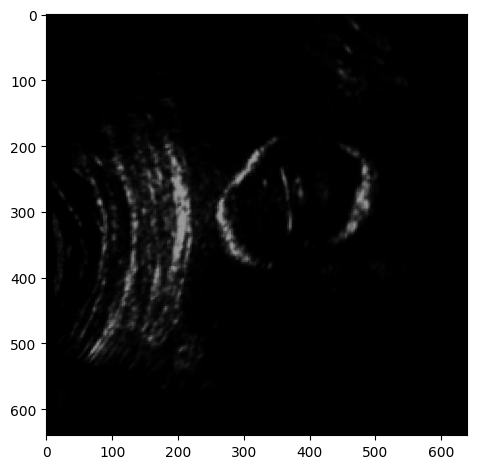

In [6]:
img=cv2.imread("/content/drive/MyDrive/MajorProject/train/1582_Copy-of-anold-chiari-malformation-16e_aug_0_png_jpg.rf.e5ef5df762e26214f18a8d61c7b3ce6f.jpg")
imshow(img)

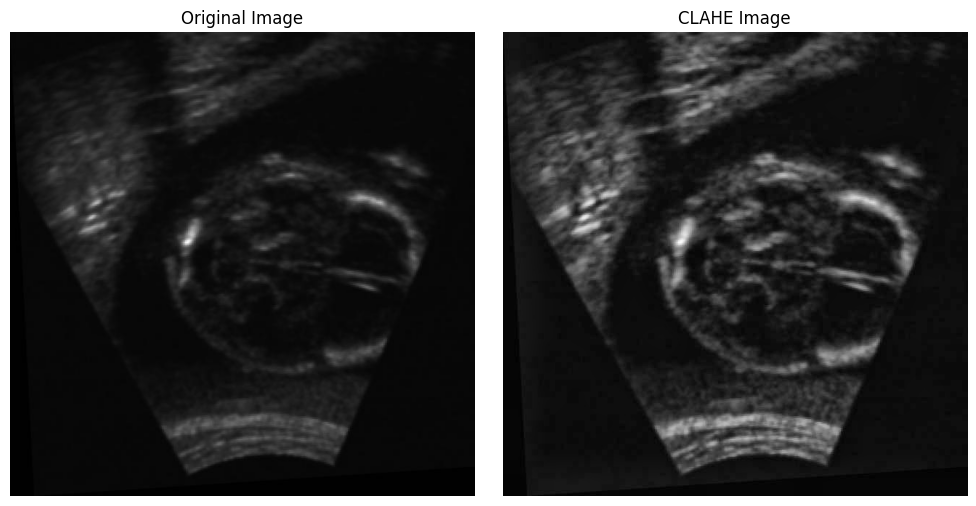